# tmp — apr24 (DELETE)

**Motivation**: scratch notebook <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

model_type = 'poisson'

In [3]:
cfg_vae, cfg_tr = default_configs('MNIST')
cfg_vae['init_scale'] = 1e-1

print(f"VAE:\n{cfg_vae}\n\nTrainer:\n{cfg_tr}")

VAE:
{'dataset': 'MNIST', 'prior_clamp': -3.0, 'prior_log_dist': 'uniform', 'init_scale': 0.1, 'rmax_q': 1.0, 
'n_latents': 10, 'enc_type': 'conv', 'dec_type': 'conv', 'enc_bias': True, 'dec_bias': True, 'weight_norm': False}

Trainer:
{'method': 'mc', 'kl_beta': 1.0, 'kl_anneal_portion': 0.5, 'lambda_anneal': True, 'lambda_init': 0.0, 
'lambda_norm': 0.0, 'temp_anneal_portion': 0.5, 'temp_anneal_type': 'lin', 'temp_start': 1.0, 'temp_stop': 0.05, 
'lr': 0.002, 'epochs': 900, 'batch_size': 200, 'optimizer_kws': {'weight_decay': 0.0005}, 'grad_clip': 1000}

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  PoissonVAE |  6.2 Mil   |
|     ---     |    ---     |
|     stem    |    352     |
|     enc     |  4.9 Mil   |
|    fc_enc   |   2.6 K    |
|    fc_dec   |   11.3 K   |
|     dec     |  1.2 Mil   |
+-------------+------------+

poisson_uniform_c(-3)_rmax(1)_MNIST_z-10_k-32_<conv+b|conv+b>
mc_b200-ep900-lr(0.002)_beta(1:0x0.5)_temp(0.05:lin-0.5)_gr(1000)_(2024_05_01,14:15)

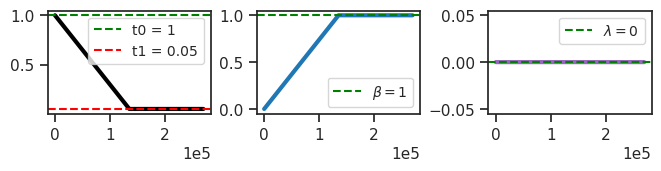

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

vae.print()
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.show_schedules()

In [5]:
print(vae)

PoissonVAE(
  (mse): MSELoss()
  (stem): Conv2D(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (enc): Sequential(
    (0): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (1): Cell(
      (skip): StrideReduce(
        (swish): SiLU()
        (conv): Conv2D(32, 64, kernel_size=(1, 1), stride=(2, 2))
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (2): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (3): Cell(
      (skip): StrideReduce(
        (swish): SiLU()
        (conv): Conv2D(64, 128, kernel_size=(1, 1), stride=(2, 2))
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (4): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (5): Cell(
      (skip): StrideReduce(
        (swish): SiLU()
        (conv): Conv2D(128, 256, kernel_size=(1, 1), stride=(2, 2))
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=256, out_features=16, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=16, out_features=256, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (6): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
    

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:1')

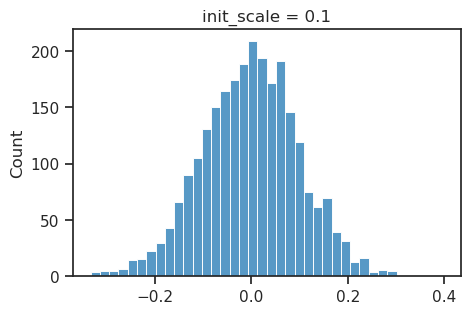

In [6]:
ax = sns.histplot(to_np(vae.fc_enc.weight.data).ravel())
ax.set_title(f"init_scale = {vae.cfg.init_scale}")
vae.fc_enc.bias.data

In [ ]:
comment = f"init_0.1_{tr.cfg.name()}"
# comment = tr.cfg.name()
tr.train(comment=comment)

epoch # 529, avg loss: 34.085738:  59%|█████████████▌         | 529/900 [1:35:45<1:04:24, 10.42s/it]

In [ ]:
data, loss, etc = tr.validate()

_loss = {k: v.mean() for k, v in loss.items()}
_loss['tot'] = _loss['mse'] + _loss['kl']
print(_loss)

In [ ]:
tr.show_recon(0.0), tr.show_samples(0.0);

In [ ]:
def _show_pairwise(i, j):
    df = pd.DataFrame({
        f'z-{i}': etc['r*dr'][:, i],
        f'z-{j}': etc['r*dr'][:, j],
        f'z-{i}_log': np.log(etc['r*dr'][:, i]),
        f'z-{j}_log': np.log(etc['r*dr'][:, j]),
        'lbl': tr.dl_vld.dataset.tensors[1],
    })
    fig, axes = create_figure(1, 2, (8, 4.5), layout='constrained')
    sns.scatterplot(data=df, x=f'z-{i}', y=f'z-{j}', hue='lbl', palette='tab10', s=20, ax=axes[0])
    sns.scatterplot(data=df, x=f'z-{i}_log', y=f'z-{j}_log', hue='lbl', palette='tab10', s=5, legend=False, ax=axes[1])
    axes[1].axvline(0, color='k', ls='--', lw=1.0, zorder=0)
    axes[1].axhline(0, color='k', ls='--', lw=1.0, zorder=0)
    ax_square(axes)
    plt.show()

In [ ]:
for i, j in list(itertools.combinations(
    range(tr.model.cfg.n_latents), 2)):
    _show_pairwise(i, j)

In [ ]:
df, df_summary = knn_analysis(
    x=etc['log_dr'],
    y=to_np(tr.dl_vld.dataset.tensors[1]),
    n_iter=100,
    verbose=True,
)

In [ ]:
df_summary